# DSCI 235 spr 2024 Assignment 2

<span style="color: brown;">Jessica Reyes</span>

**Instructions.** In this assignment we will answer some of the same questions from assignment 1.  The objective of this assignment is to practice Multi-Indexing, so **do not** use Boolean indexing / Boolean masks unless explicitly suggested you do so.  Also, do not use pandas functionality that we haven't covered in class unless explicitly suggested.  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Baby names in Colorado and Texas

In this assignment we will continue to analyze baby names.  This time the data will contain data collected in Colorado and Texas.
The data follows the same format as in the previous assignment:

```
CO,F,1910,Mary,193
CO,F,1910,Helen,112
CO,F,1910,Dorothy,87
CO,F,1910,Ruth,68
CO,F,1910,Margaret,67
...
TX,F,1910,Mary,895
TX,F,1910,Ruby,314
TX,F,1910,Annie,277
TX,F,1910,Willie,260
TX,F,1910,Ruth,252
...
```

The first column specifies the state (CO or TX), the second column is the gender (F/M), the third column is the year (1910-2018), and the last column is the number babies that were given that name during that year and state.

First, we will load the data straight into the Jupyter notebook:

#### Reading in the data

We'll use the pandas `read_csv` function to read the data:

In [2]:
# code for reading the data appropriately and creating a multi-index
names_flat = pd.read_csv('https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/co_tx.txt', header=None, names=['state', 'gender', 'year', 'name', 'count'])
names_flat.head()

,state,gender,year,name,count
0,CO,F,1910,Mary,193
1,CO,F,1910,Helen,112
2,CO,F,1910,Dorothy,87
3,CO,F,1910,Ruth,68
4,CO,F,1910,Margaret,67


Next let's index it by state, gender, year, and name:

In [3]:
names=names_flat.set_index(['state','gender','year', 'name'])
names.head()

count
state gender year name           
CO    F      1910 Mary        193
                  Helen       112
                  Dorothy      87
                  Ruth         68
                  Margaret     67

You may choose to reindex the DataFrame depending on the needs of each question.

#### Most popular names

* What was the most popular female baby name in Colorado in 2018? (You can use `idxmax`).


In [4]:
pop_name = names.loc[('CO','F',2018)].idxmax()
pop_name

count    Olivia
dtype: object

#### Increase in popularity

Which Colorado male name has shown the largest increase in popularity from 2017 to 2018?  Use the `subtract` method using a fill_value of 0 to prevent `NaN`s.

In [5]:
largest_increase = (names.loc[('CO','M',2018)].subtract(names.loc[('CO','M',2017)], fill_value=0)).idxmax()
largest_increase

count    Nolan
dtype: object

#### How many babies?

Compute how many babies were born in Colorado in 1945.

In [7]:
babies = names.loc[('CO', slice(None), 1945)].sum()
babies

count    21341
dtype: int64

#### Earliest occurrence of a name

What year did "Taylor" make its first appearance as a female name in Texas?  As a male name in Texas?  You can do this with or without using `reset_index` to change the index.

In [13]:
female_taylor = names.loc[('TX','F')].reset_index().loc[names.loc[('TX','F')].reset_index()['name'] == 'Taylor'].min()['year']
print(f"First appearance of 'Taylor' as a female name in Texas: {female_taylor}")

male_taylor = names.loc[('TX','M')].reset_index().loc[names.loc[('TX','M')].reset_index()['name'] == 'Taylor'].min()['year']
print(f"First appearance of 'Taylor' as a male name in Texas: {male_taylor}")

First appearance of 'Taylor' as a female name in Texas: 1975
First appearance of 'Taylor' as a male name in Texas: 1910


#### Combining data across Colorado and Texas

Create a new `DataFrame` that contains the sum of name counts from Colorado and Texas for each name for each year and gender.  The count column in this `DataFrame` will be the sum of the counts for a given baby name in Texas and Colorado for that give year in that gender.  Use the `add` method for this task.


In [14]:
names_combined = names.loc[('CO', slice(None)), :].add(names.loc[('TX', slice(None)), :], fill_value=0)
names_combined

count
state gender year name         
CO    F      1910 Ada       5.0
                  Agnes    14.0
                  Alice    46.0
                  Alma     12.0
                  Amelia   10.0
...                         ...
TX    M      2018 Zlatan    6.0
                  Zuriel    8.0
                  Zyaire   16.0
                  Zyan      8.0
                  Zyon     21.0

[456990 rows x 1 columns]

## Analyzing annual GDP

Next, we will analyze a dataset of annual Gross Domestic Product (GDP) collected from the 1960's across the world.  And remember - no Boolean indexing in this assignment!

In [15]:
gdp = pd.read_csv('http://cs.colostate.edu/~asa/courses/dsci235/spr21/data/worldstats.csv')
gdp.head()

,index,country,year,population,GDP
0,2271,Afghanistan,2015,32526562.0,1.919944e+10
1,2272,Afghanistan,2014,31627506.0,2.005019e+10
2,2273,Afghanistan,2013,30682500.0,2.004633e+10
3,2274,Afghanistan,2012,29726803.0,2.053654e+10
4,2275,Afghanistan,2011,28809167.0,1.793024e+10


Set the index to a MultiIndex that will help you answer the following questions:

* Create a DataFrame or Series that contains the GDP numbers for Pakistan between 2005 and 2010 (inclusive of the end points).

In [16]:
pakistan_gdp = gdp[(gdp['country'] == 'Pakistan') & (gdp['year'].between(2005, 2010))]
pakistan_gdp_filtered = pakistan_gdp[['year', 'GDP']].set_index('year')
pakistan_gdp_filtered

,GDP
year,
2010,1.774069e+11
2009,1.681528e+11
2008,1.700778e+11
2007,1.523857e+11
2006,1.372641e+11
2005,1.095021e+11


* Compute the GDP per person, and add that to the data frame as a column labeled per_capita_gdp.

In [17]:
gdp['per_capita_gdp'] = gdp['GDP'] / gdp['population']
gdp

,index,country,year,population,GDP,per_capita_gdp
0,2271,Afghanistan,2015,32526562.0,1.919944e+10,590.269515
1,2272,Afghanistan,2014,31627506.0,2.005019e+10,633.947864
2,2273,Afghanistan,2013,30682500.0,2.004633e+10,653.347488
3,2274,Afghanistan,2012,29726803.0,2.053654e+10,690.842629
4,2275,Afghanistan,2011,28809167.0,1.793024e+10,622.379654
...,...,...,...,...,...,...
8935,11206,Zimbabwe,1964,4279561.0,1.217138e+09,284.407209
8936,11207,Zimbabwe,1963,4140804.0,1.159512e+09,280.020909
8937,11208,Zimbabwe,1962,4006262.0,1.117602e+09,278.963682
8938,11209,Zimbabwe,1961,3876638.0,1.096647e+09,282.885996


* Find the country that had the largest per-capita growth in GDP from 1990 to 2015.

In [18]:
gdp['per_capita_gdp'] = gdp['GDP'] / gdp['population']

gdp_filtered = gdp[gdp['year'].isin([1990, 2015])]

gdp_pivot = gdp_filtered.pivot(index='country', columns='year', values='per_capita_gdp')

gdp_pivot['growth'] = gdp_pivot[2015] - gdp_pivot[1990]
max_growth_country = gdp_pivot['growth'].idxmax()
max_growth_value = gdp_pivot['growth'].max()


print(f"The country with the largest per capita GDP growth from 1990 to 2015 is {max_growth_country} with a growth of {max_growth_value:.2f}")

The country with the largest per capita GDP growth from 1990 to 2015 is Macao SAR, China with a growth of 70273.70


* Plot the per_capita_gdp over time of three countries of your choice in a single graph.  Use a DataFrame's `plot` function for this.  The following [Stack Overflow post](https://stackoverflow.com/questions/45467320/plot-multiple-pandas-dataframes-in-one-graph) will help you in figuring out how to make pandas plot everything in the same graph.

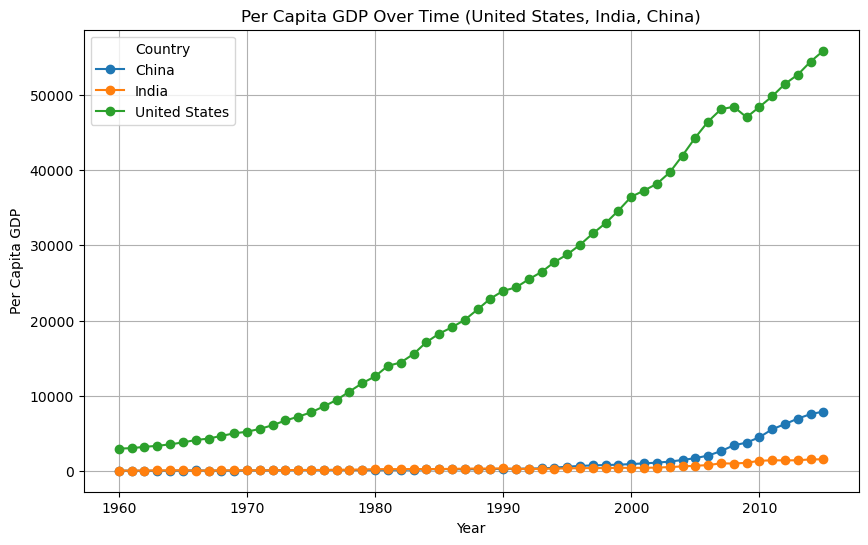

In [19]:
gdp['per_capita_gdp'] = gdp['GDP'] / gdp['population']

# Select three countries (e.g., United States, India, China)
countries = ['United States', 'India', 'China']
gdp_selected = gdp[gdp['country'].isin(countries)]

gdp_pivot = gdp_selected.pivot(index='year', columns='country', values='per_capita_gdp')

# Plot the data
gdp_pivot.plot(figsize=(10, 6), marker='o', linestyle='-')

plt.title("Per Capita GDP Over Time (United States, India, China)")
plt.xlabel("Year")
plt.ylabel("Per Capita GDP")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

### Submission

Submit your assignment as a Jupyter notebook via Canvas.  

### Grading 

Here is what the grade sheet will look like for this assignment. 

```
Grading sheet for assignment 3

Baby names (60 pts)

  Most popular baby name in Colorado in 2018 (10 pts)
  Increase in popularity (10 pts)
  Unisex names (10 pts)
  How many babies in Colorado (10 pts)
  Earliest occurrence (10 pts)
  Combined data (10 pts)
  
GDP (40 pts)

  GDP of Pakistan (10 pts)
  GDP per person (10 pts)
  GDP growth (10 pts)
  GDP plot (10 pts)

```

Throughout the course, use of for loops is discouraged.  **Points will be taken off for using for loops unless explicitly allowed.**  pandas provides tools for accomplishing things without the need for Python loops.
